# Binned Training Notebook (Refactored)

This refactored version uses modular classes to reduce code duplication and improve maintainability.
The original functionality is preserved but organized into:

- `DataLoader`: Handles data loading and feature detection
- `KinematicReweighter`: Manages all reweighting operations
- `ModelBuilder`: Creates model pipelines
- `BinnedTrainingPlotter`: Generates all plots
- `BinnedTrainingPipeline`: Main orchestration class

## Libraries and Dependencies

**Core Data Science Libraries:**
- `numpy>=1.21.0`: Numerical computing and array operations
- `pandas>=1.3.0`: Data manipulation and analysis
- `scikit-learn>=1.0.0`: Machine learning algorithms and utilities
- `scipy>=1.7.0`: Scientific computing and statistical functions

**Machine Learning:**
- `xgboost>=1.5.0`: Gradient boosting framework for BDT training
- `joblib>=1.1.0`: Parallel processing and model persistence

**Data I/O:**
- `uproot>=4.0.0`: ROOT file reading for physics data
- `PyYAML>=6.0`: Configuration file parsing

**Visualization:**
- `matplotlib>=3.5.0`: Basic plotting and visualization
- `seaborn>=0.11.0`: Statistical data visualization

## Code Architecture and Flow

**Main Entry Point:**
```python
from main_training import BinnedTrainingPipeline
```

**Class Dependencies:**
1. **`BinnedTrainingPipeline`** (main_training.py) - Main orchestrator
   - Calls: `DataLoader`, `KinematicReweighter`, `ModelBuilder`, `BinnedTrainingPlotter`
   - Manages: Configuration, training workflow, results collection

2. **`DataLoader`** (data_loader.py) - Data handling
   - Reads: ROOT files via uproot
   - Processes: Feature detection, data splitting
   - Outputs: Training/validation datasets

3. **`KinematicReweighter`** (reweighting.py) - Physics reweighting
   - Applies: pT, η, and vertex-based reweighting
   - Uses: scipy.stats for statistical operations
   - Integrates: With DataLoader for seamless workflow

4. **`ModelBuilder`** (model_builder.py) - ML pipeline creation
   - Creates: scikit-learn compatible pipelines
   - Integrates: XGBoost classifiers with preprocessing
   - Handles: Feature selection and model persistence

5. **`BinnedTrainingPlotter`** (plotting.py) - Visualization
   - Generates: Training metrics, correlation plots, efficiency curves
   - Uses: matplotlib/seaborn for plotting
   - Outputs: PNG files and ROOT histograms

**Configuration Flow:**
```yaml
config.yaml → BinnedTrainingPipeline → Individual Classes
```

## Memory Optimization with XGBoost

The pipeline now uses memory-saving XGBoost parameters:

- **subsample: 0.5** - Uses only 50% of data per tree (reduces memory by ~50%)
- **subsample_bynode: 0.7** - Uses 70% of data per node
- **colsample_bytree: 0.6** - Uses 60% of features per tree
- **colsample_bylevel: 0.7** - Uses 70% of features per level
- **colsample_bynode: 0.8** - Uses 80% of features per node
- **max_bin: 256** - Reduced binning precision for memory efficiency
- **grow_policy: lossguide** - Memory-efficient tree growing strategy

These settings can reduce memory usage by 30-60% while maintaining model performance.

In [1]:
# Import the refactored classes
#cd to the ppg path
import os
os.chdir('/sphenix/user/shuhangli/ppg12/FunWithxgboost')


from main_training import BinnedTrainingPipeline
import yaml

# Verify configuration
with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)
print("Configuration loaded successfully")
print(f"Training mode: {'Single model' if config['training']['train_single_model'] else 'Per-bin models'}")
print(f"Bins: {config['binning']['labels']}")

Configuration loaded successfully
Training mode: Single model
Bins: ['6_15', '15_25', '25_35']


=== Memory Usage Monitoring ===
Memory usage: 231.1 MB
--- Running Training ---
=== Starting Binned Training Pipeline ===
--- Loading and reweighting all data globally ---
ET distribution flattening: 450260/1474761 samples kept (<15.0 GeV, 20 bins, min_count=22513)
ET distribution flattening: 181120/841297 samples kept (<15.0 GeV, 20 bins, min_count=9056)
ET distribution flattening: 56700/447498 samples kept (<15.0 GeV, 20 bins, min_count=2835)
ET distribution flattening: 7000/155007 samples kept (<15.0 GeV, 20 bins, min_count=350)
Loading data for bin 6_15 (slicing cached single_file_set)...
Loading data for bin 15_25 (slicing cached single_file_set)...
Loading data for bin 25_35 (slicing cached single_file_set)...
--- Global reweighting complete ---

=== Training a single model for all bins ===


/gpfs/mnt/gpfs02/sphenix/user/shuhangli/FMNP/conversion_venv/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:23:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "subsample_bynode", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Training Complete ===
Memory usage: 7351.8 MB
Memory usage: 7351.8 MB
--- Evaluating Models ---
=== Evaluating Models ===
Memory usage: 7351.8 MB
Memory usage: 7351.8 MB
--- Debug: Checking Data Structure ---
Number of trained pipelines: 3
Bin 6_15:
  - df_bin shape: (8119687, 33)
  - df_bin columns: ['cluster_Et', 'cluster_Eta', 'cluster_Phi', 'vertexz', 'e11_over_e33', 'e32_over_e35', 'e11_over_e22', 'e11_over_e13', 'e11_over_e15', 'e11_over_e17', 'e11_over_e31', 'e11_over_e51', 'e11_over_e71', 'e22_over_e33', 'e22_over_e35', 'e22_over_e37', 'e22_over_e53', 'cluster_prob', 'cluster_weta_cogx', 'cluster_wphi_cogx', 'cluster_et1', 'cluster_et2', 'cluster_et3', 'cluster_et4', 'cluster_w32', 'cluster_w52', 'cluster_w72', 'recoisoET', 'is_tight', 'pid', 'label', 'class_weight', 'weight']
  - weight column exists with 8119687 values
  - weight range: 0.153 to 583.344
Bin 15_25:
  - df_bin shape: (8119687, 33)
  - df_bin columns: ['cluster_Et', 'cluster_Eta', 'cluster_Phi', 'vertexz', '

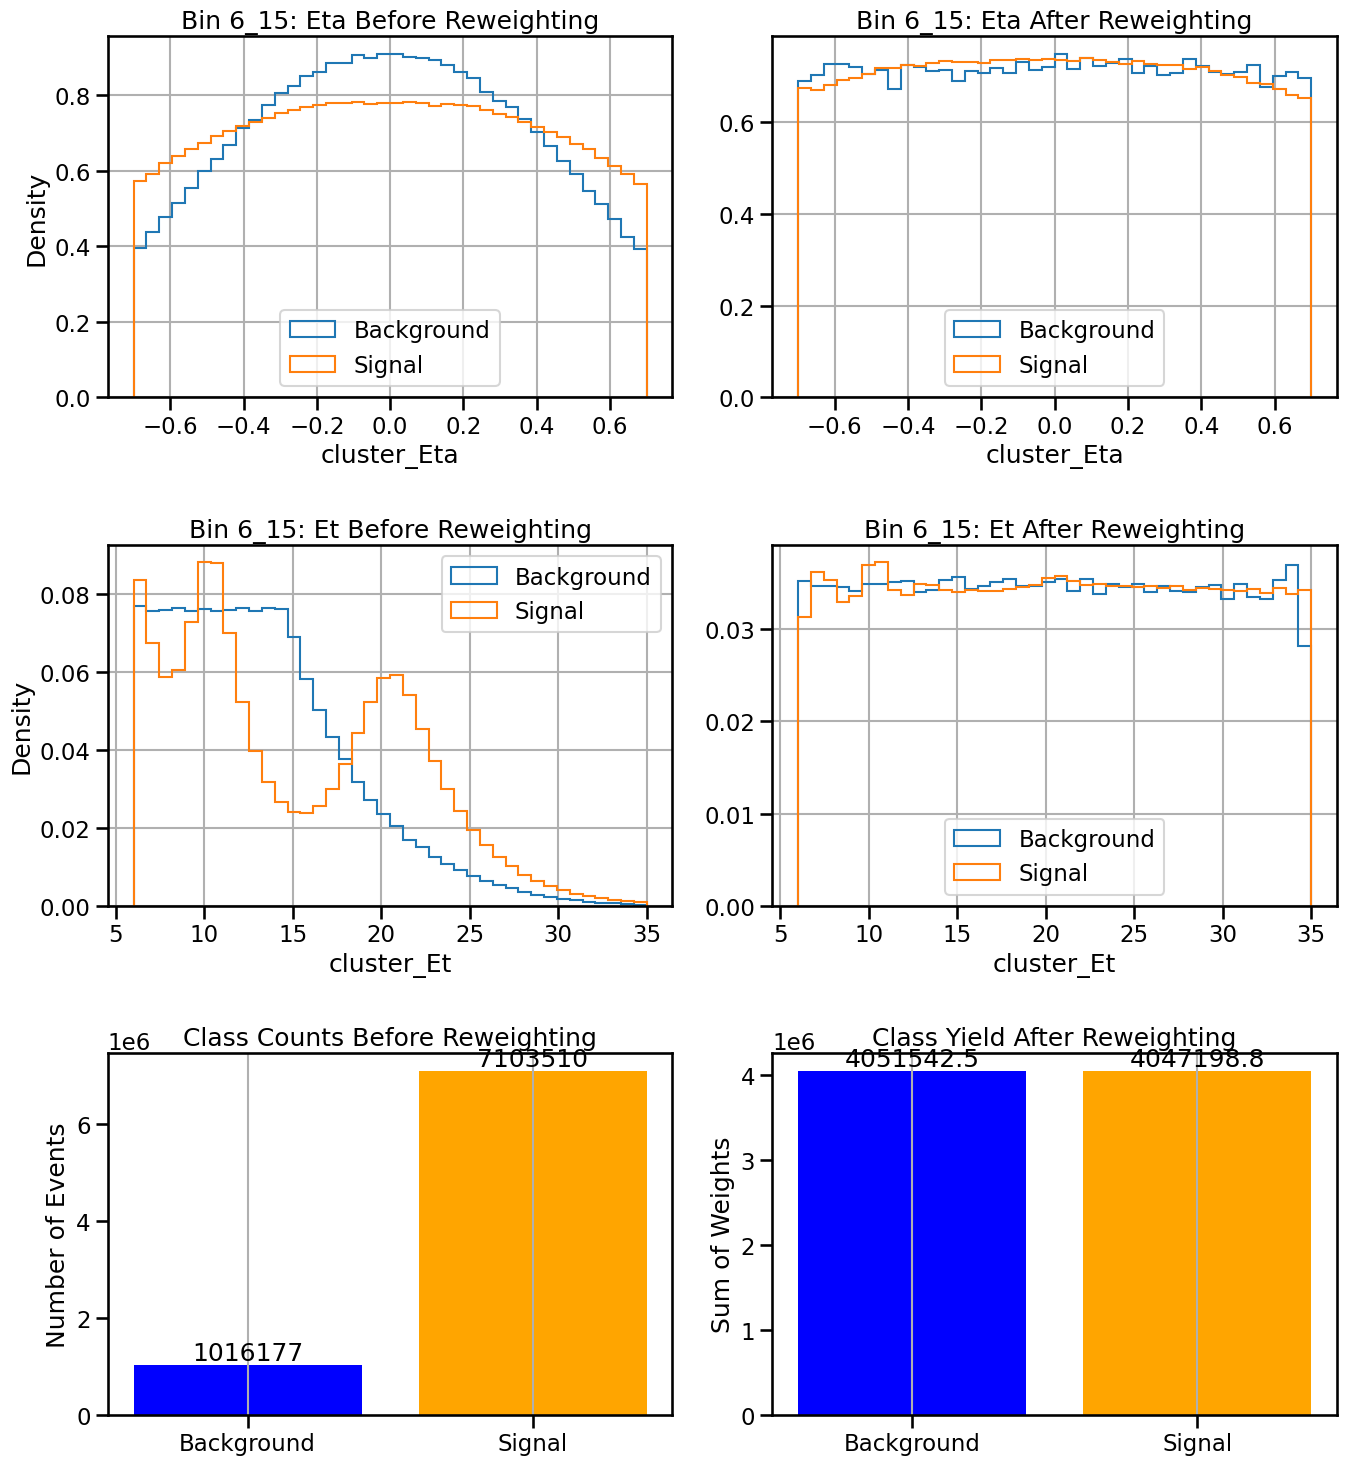

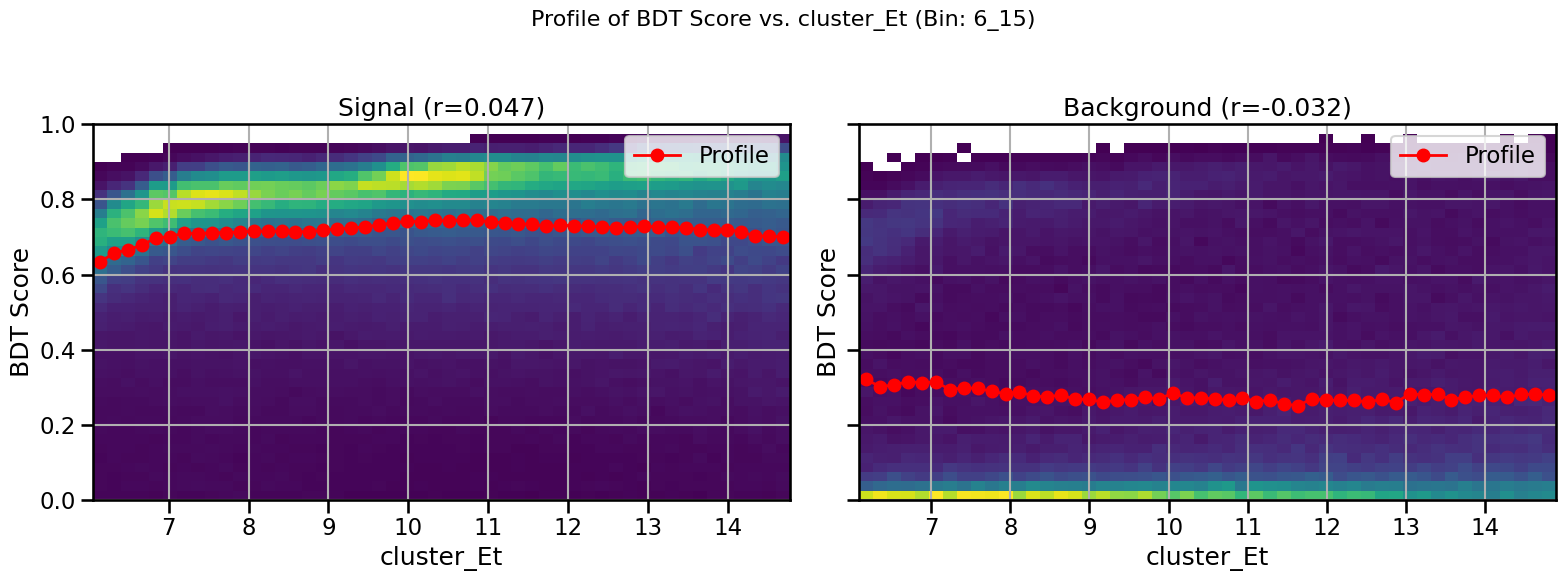

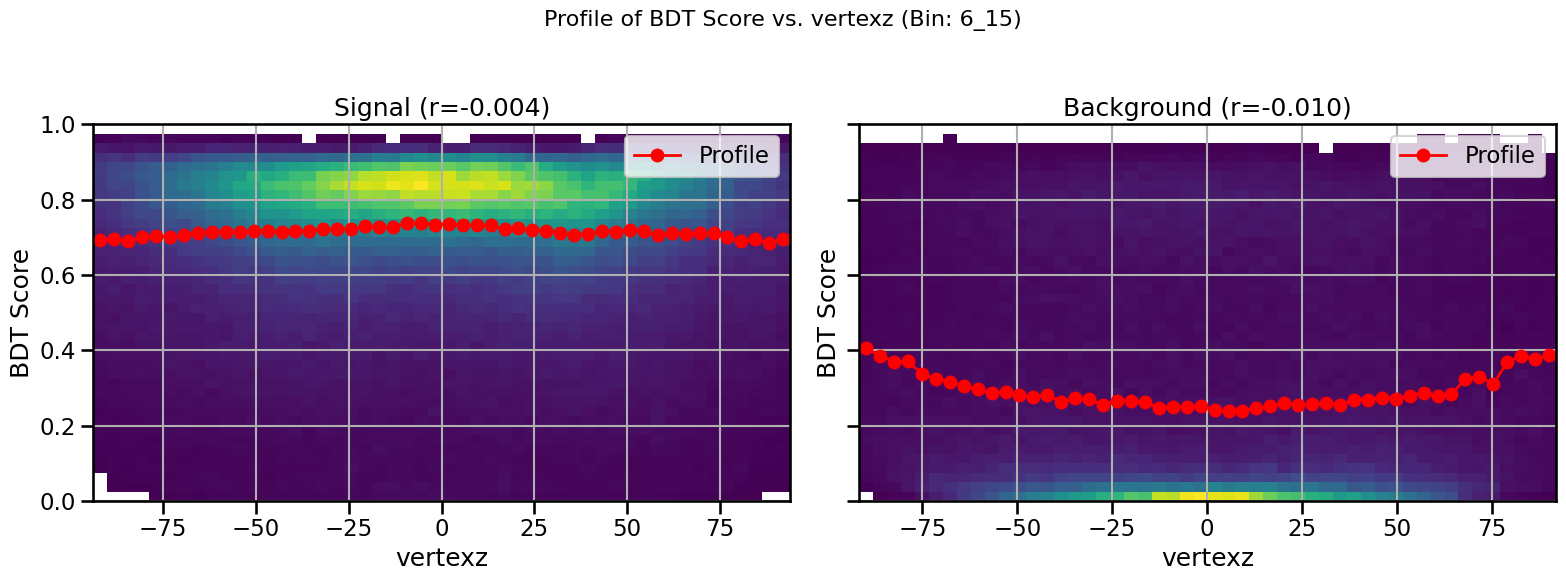

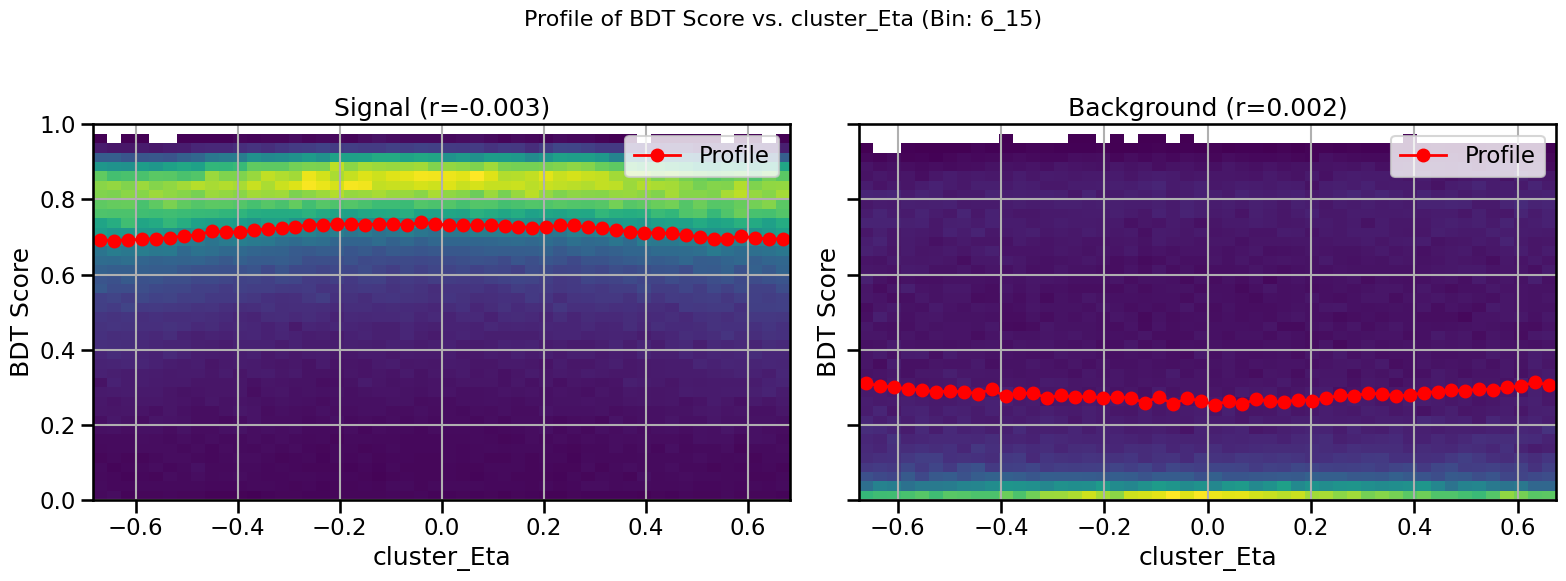

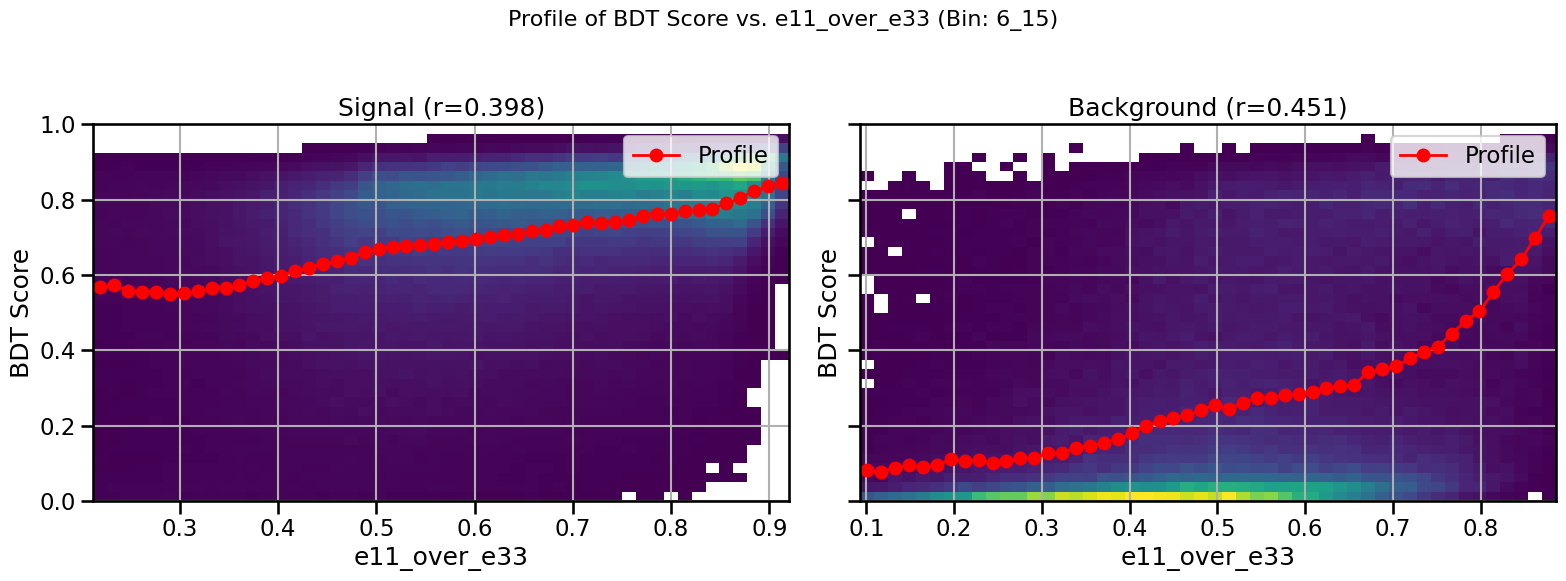

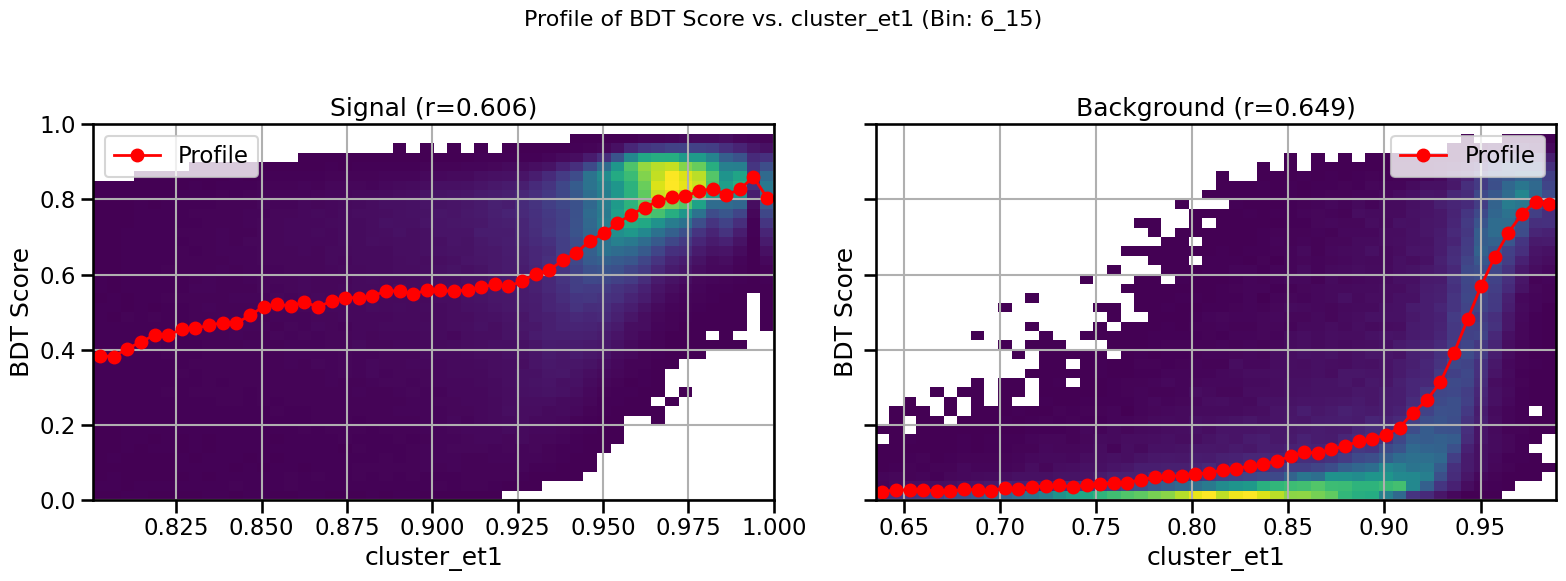

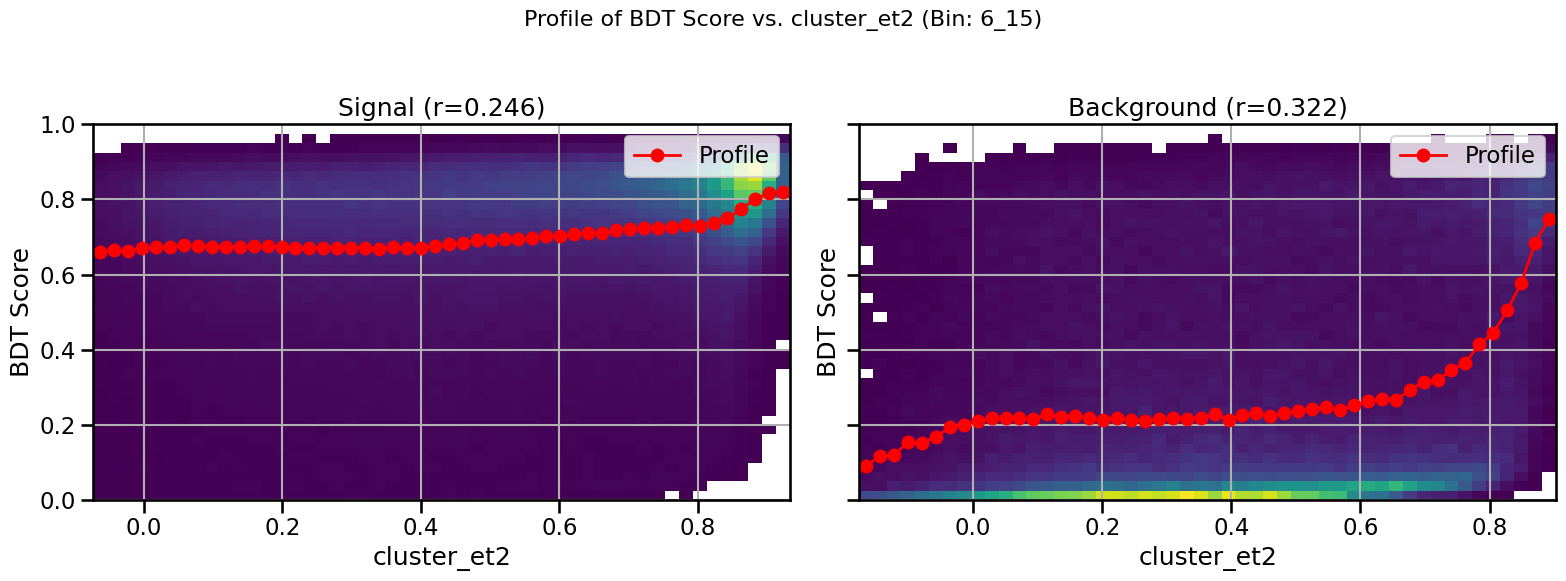

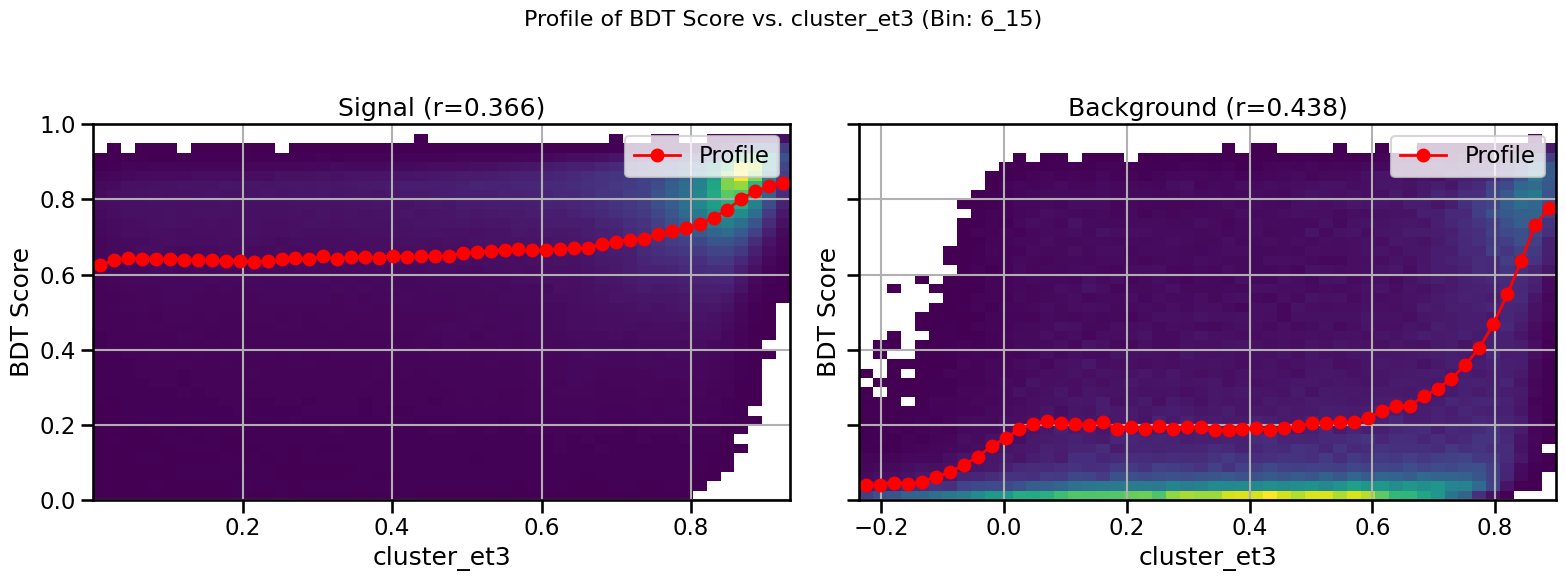

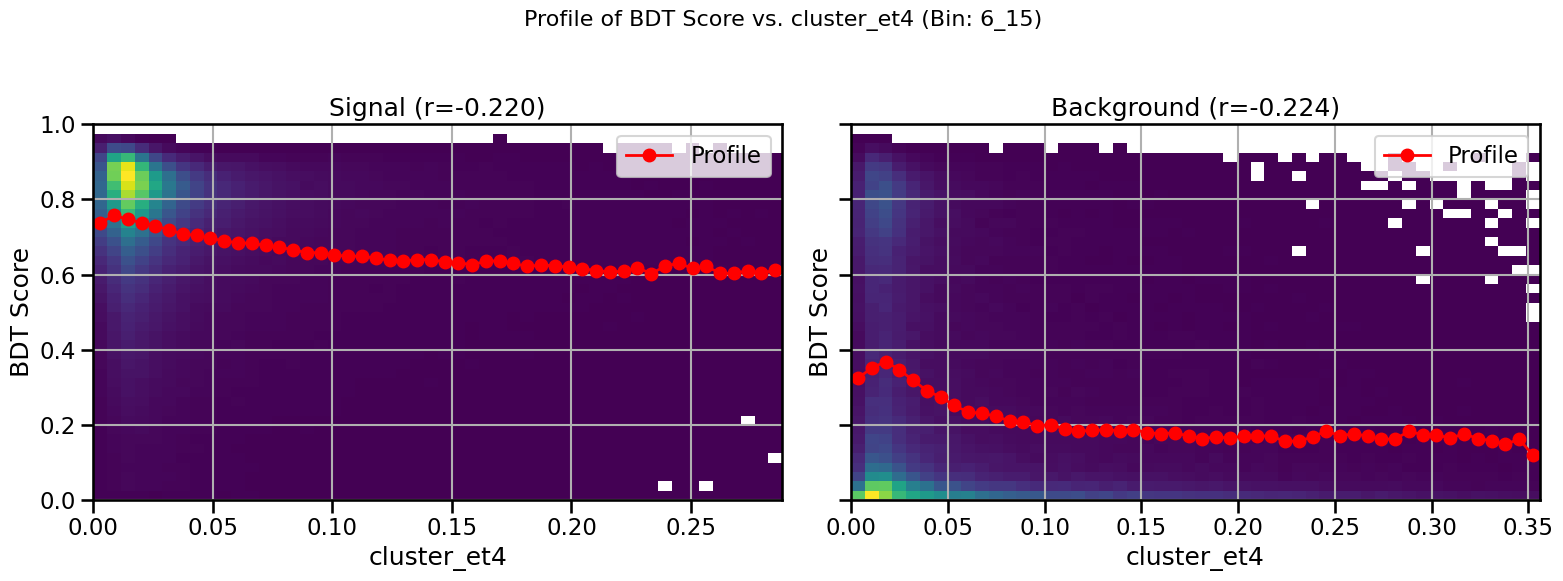

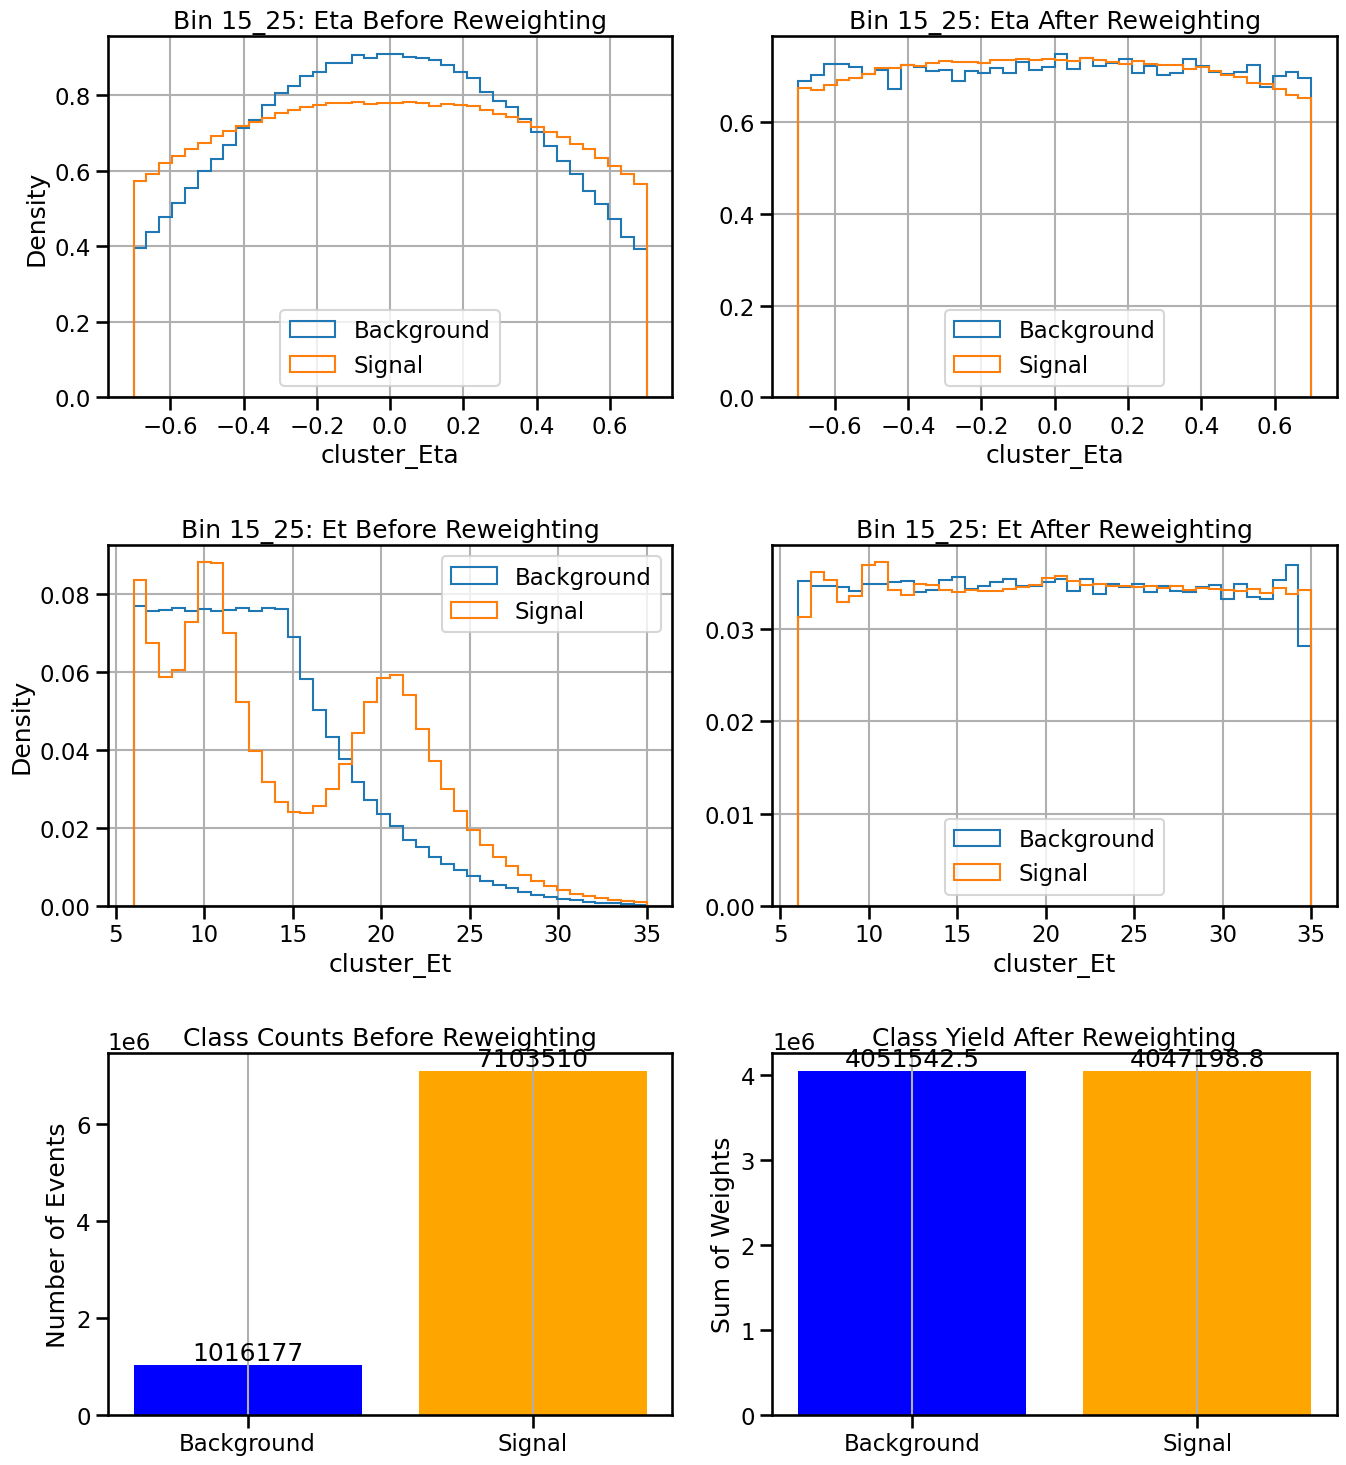

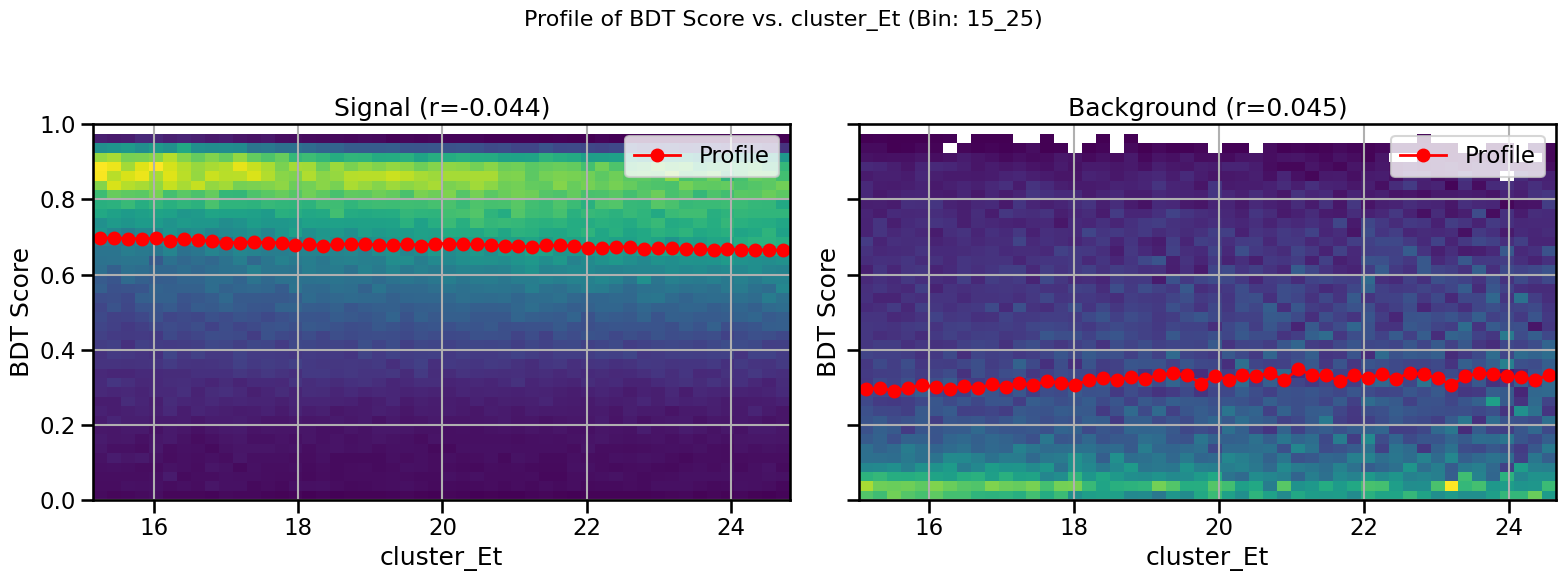

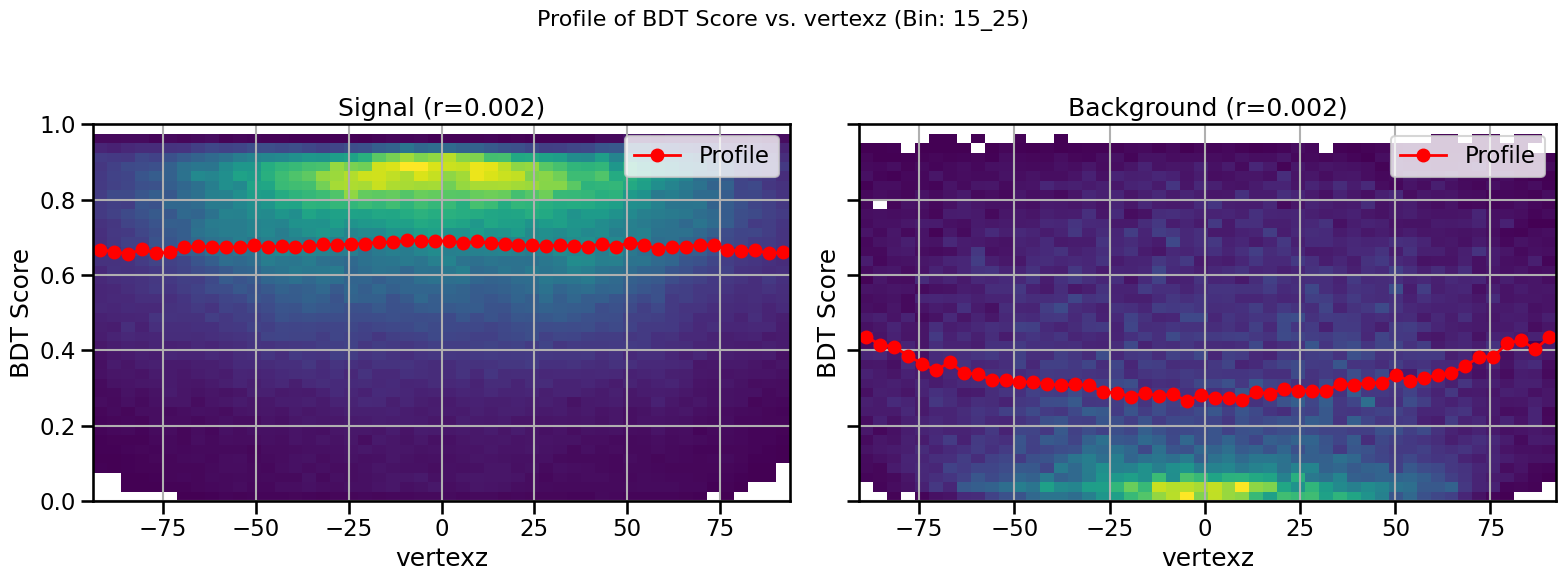

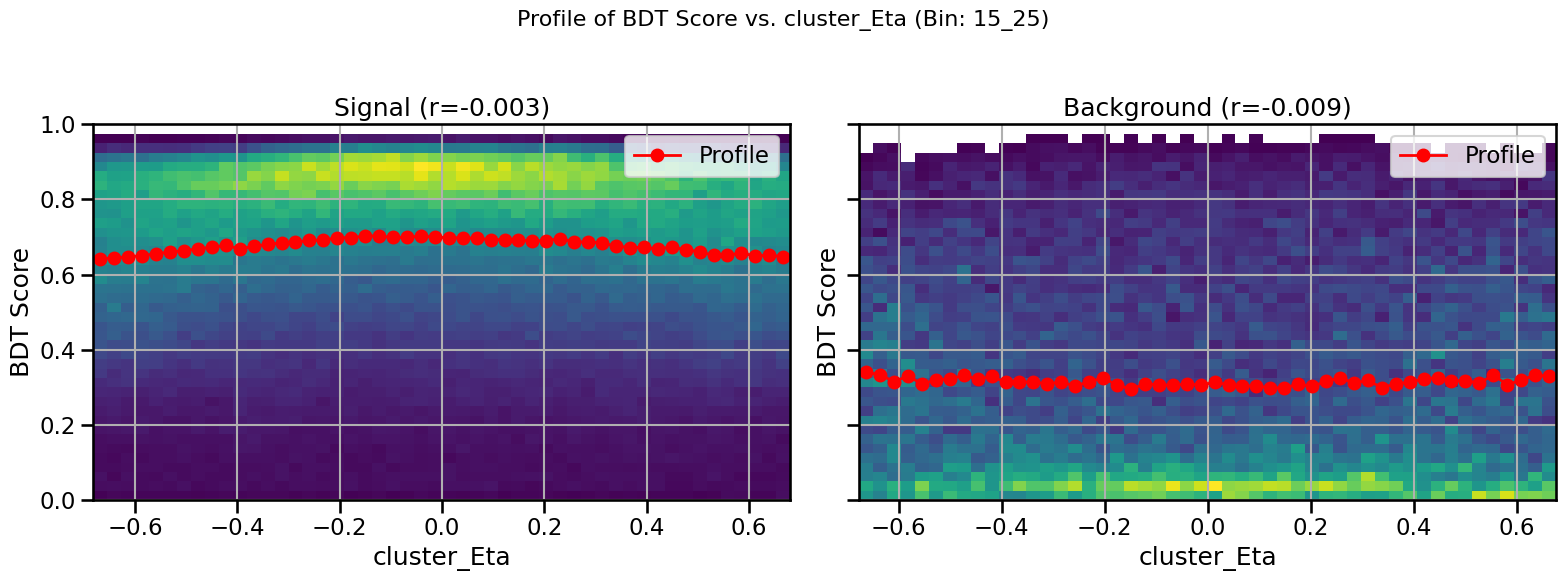

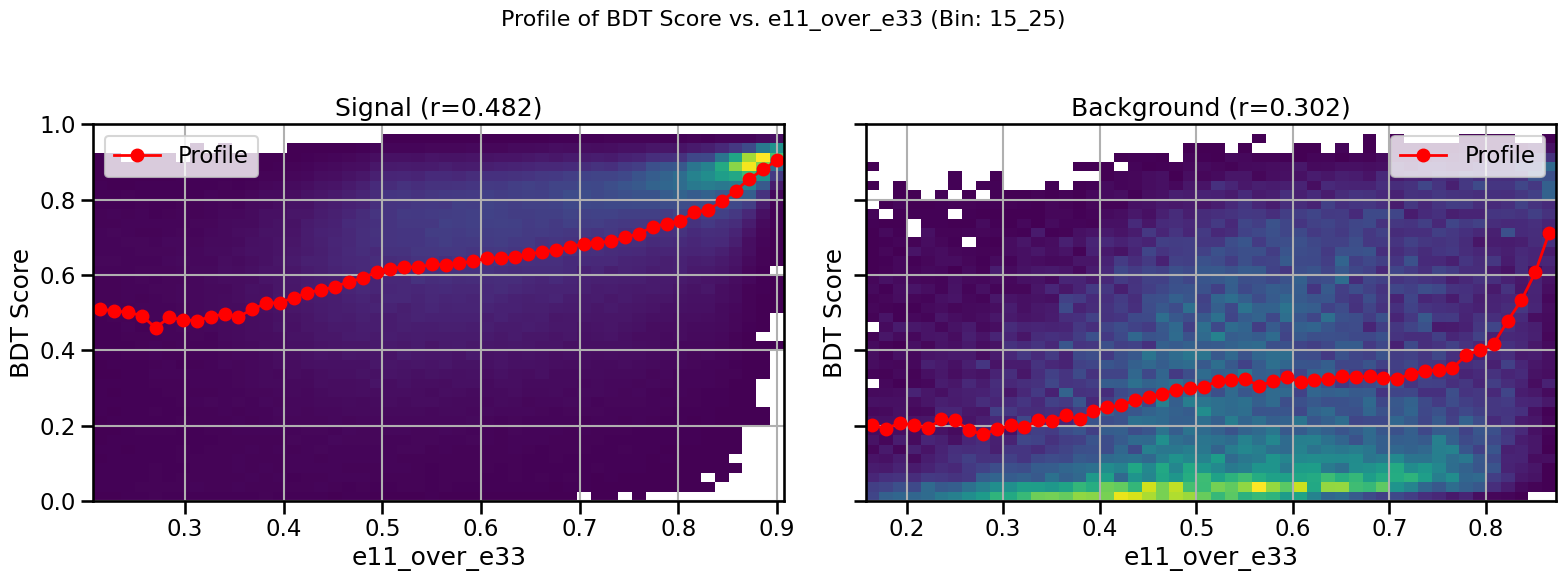

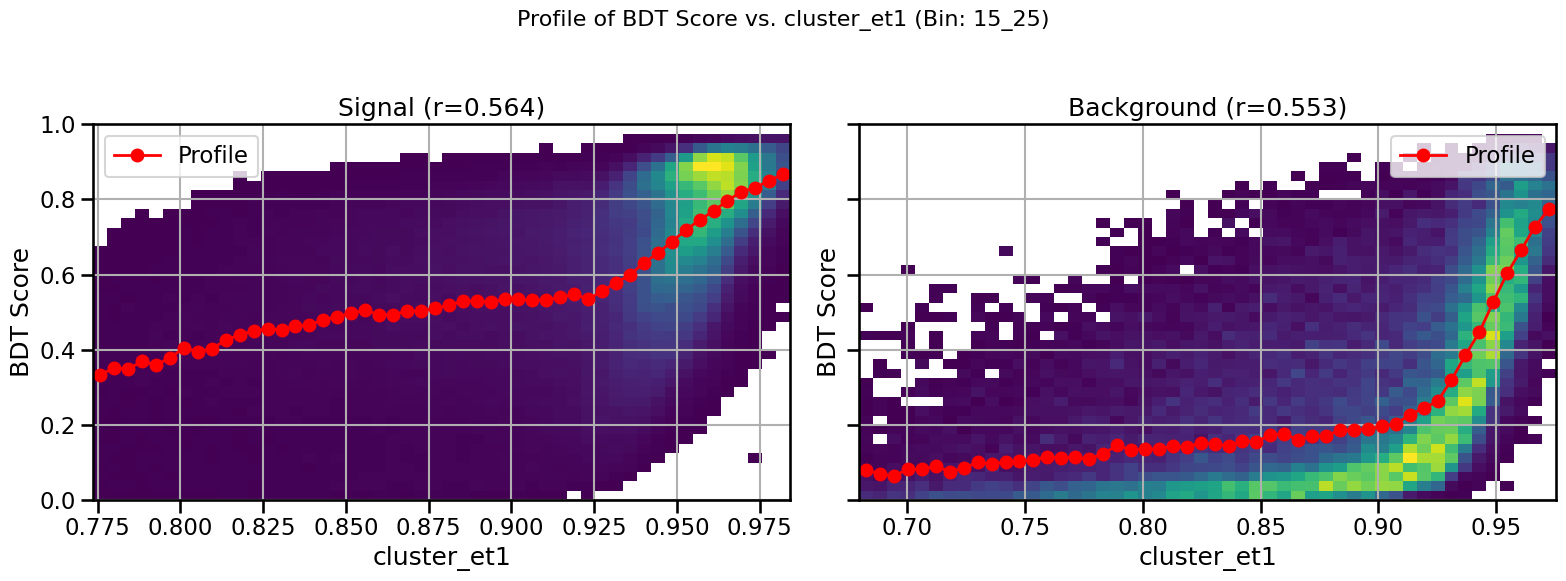

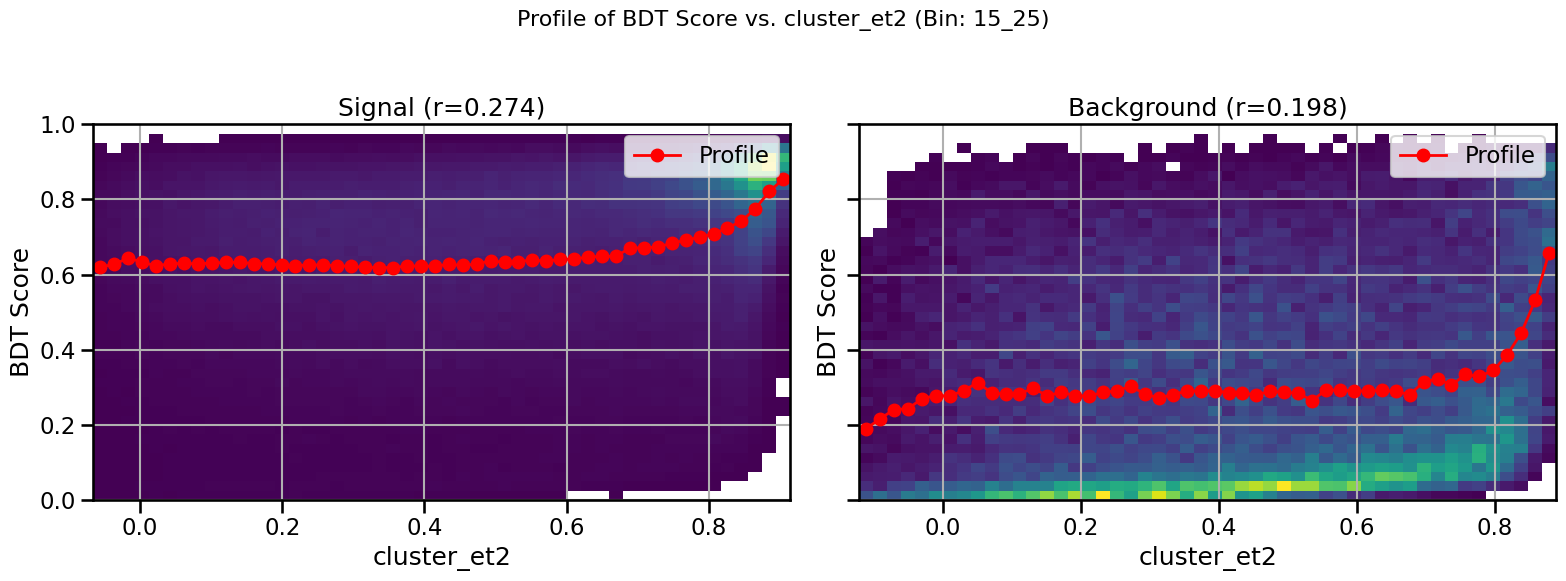

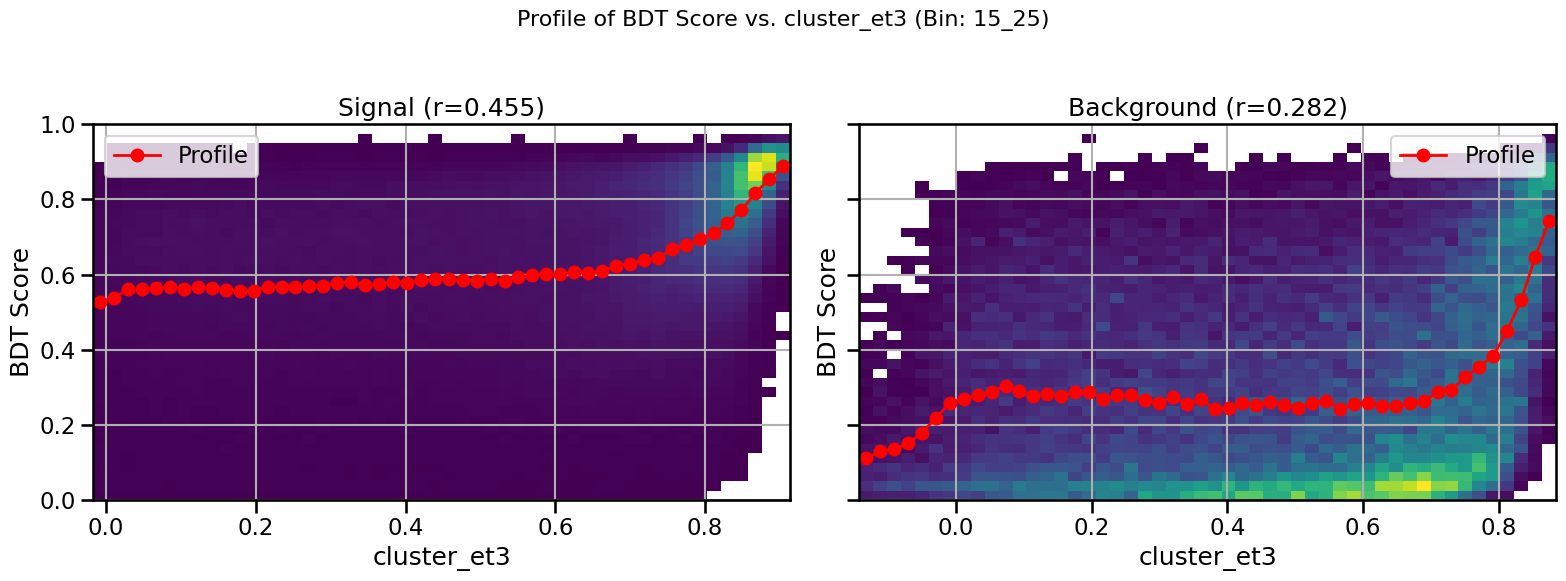

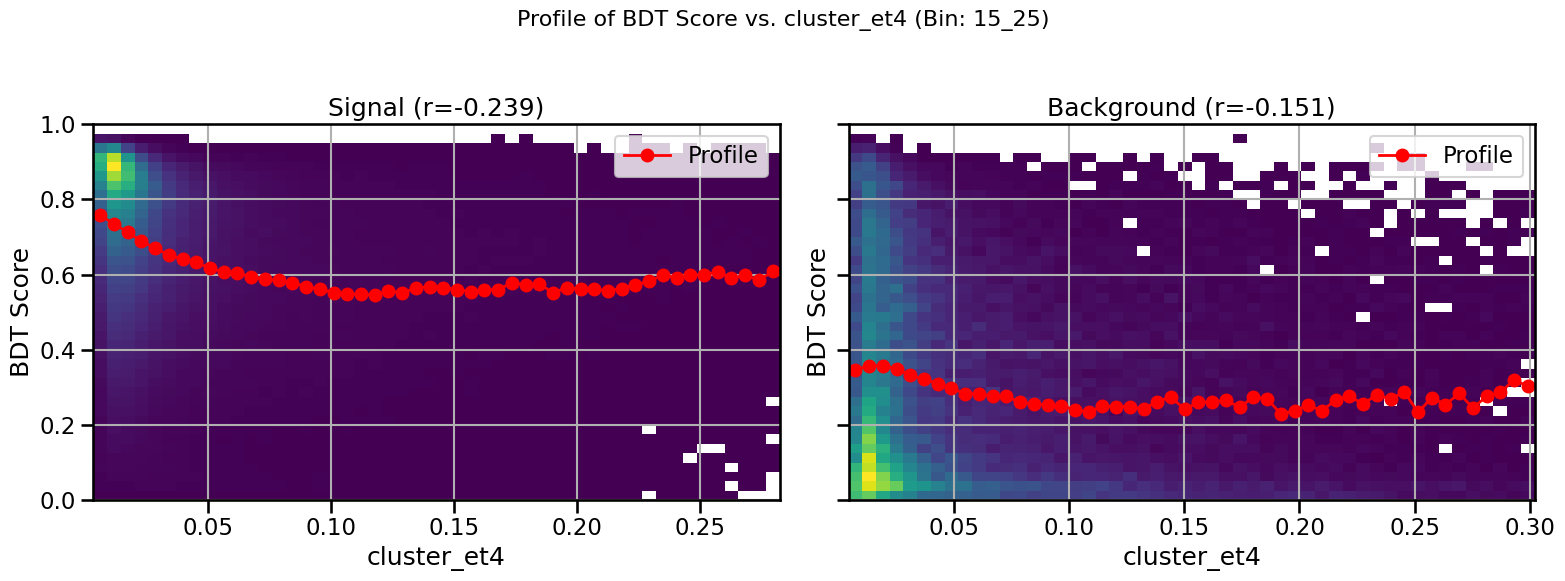

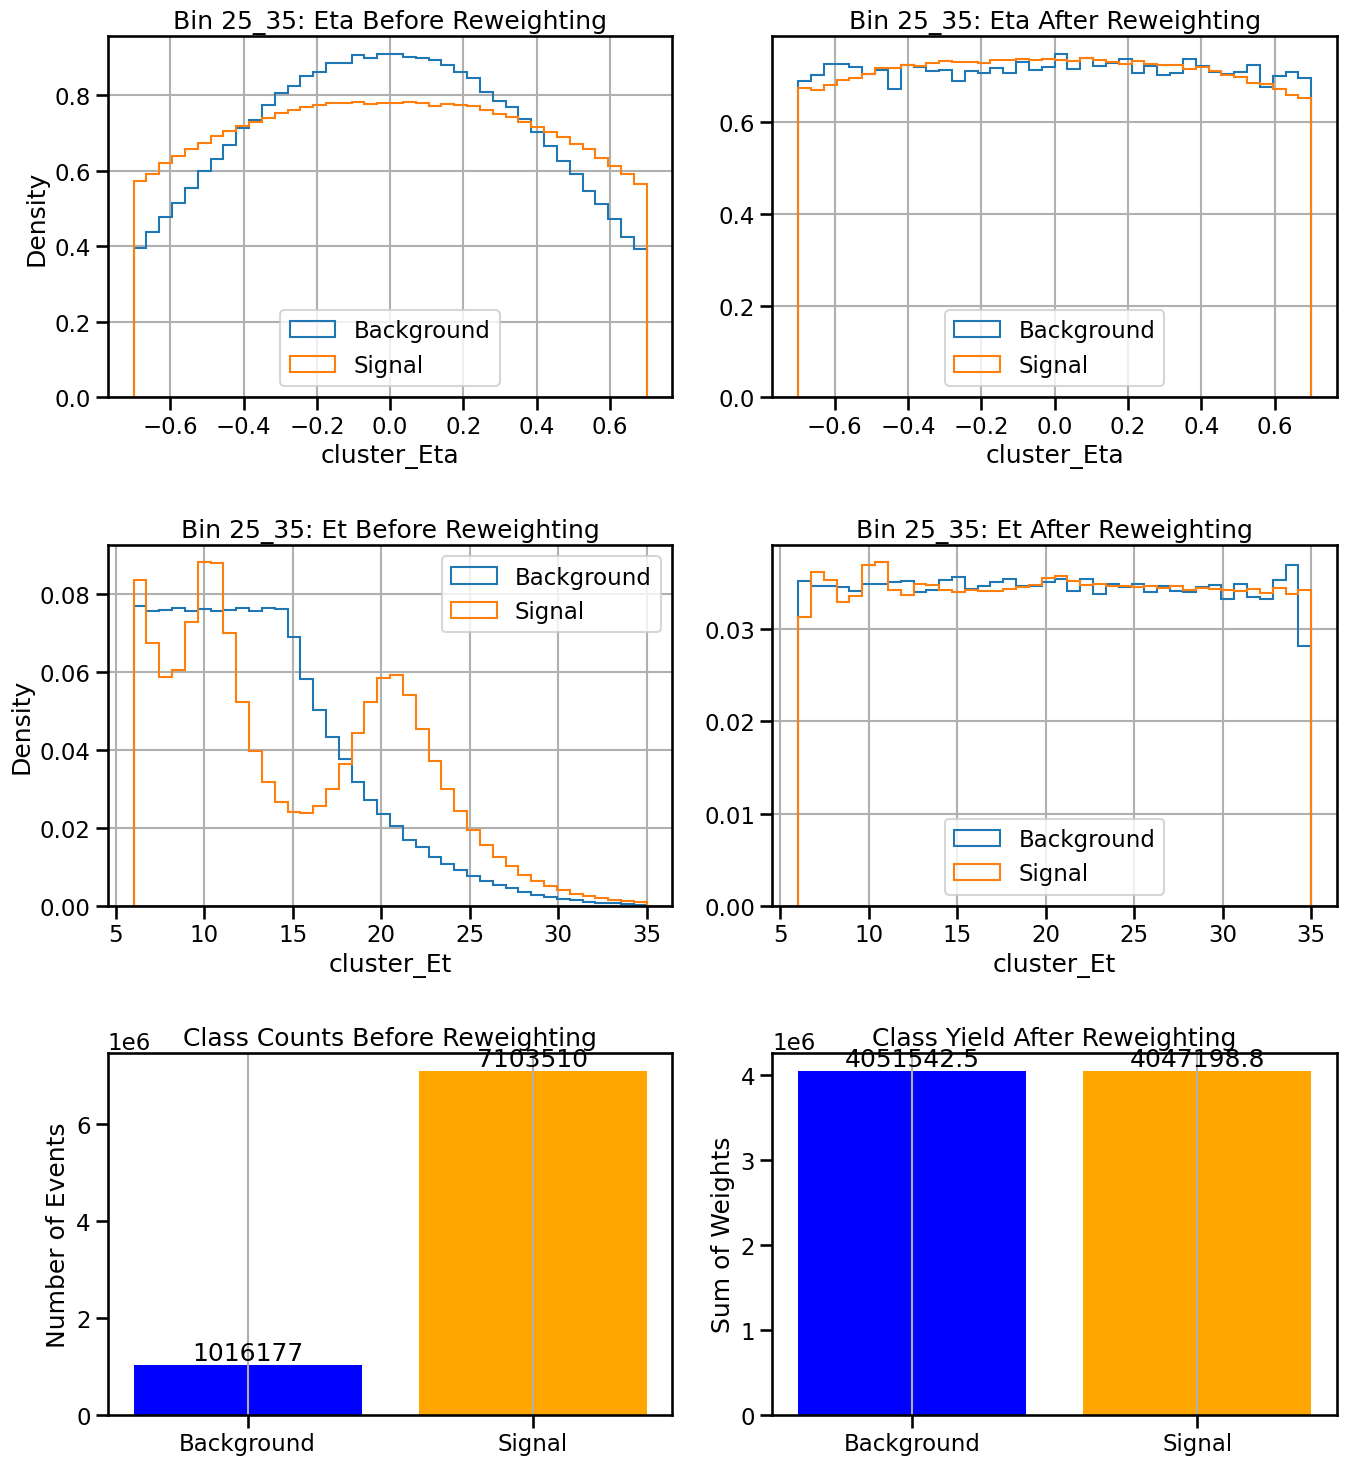

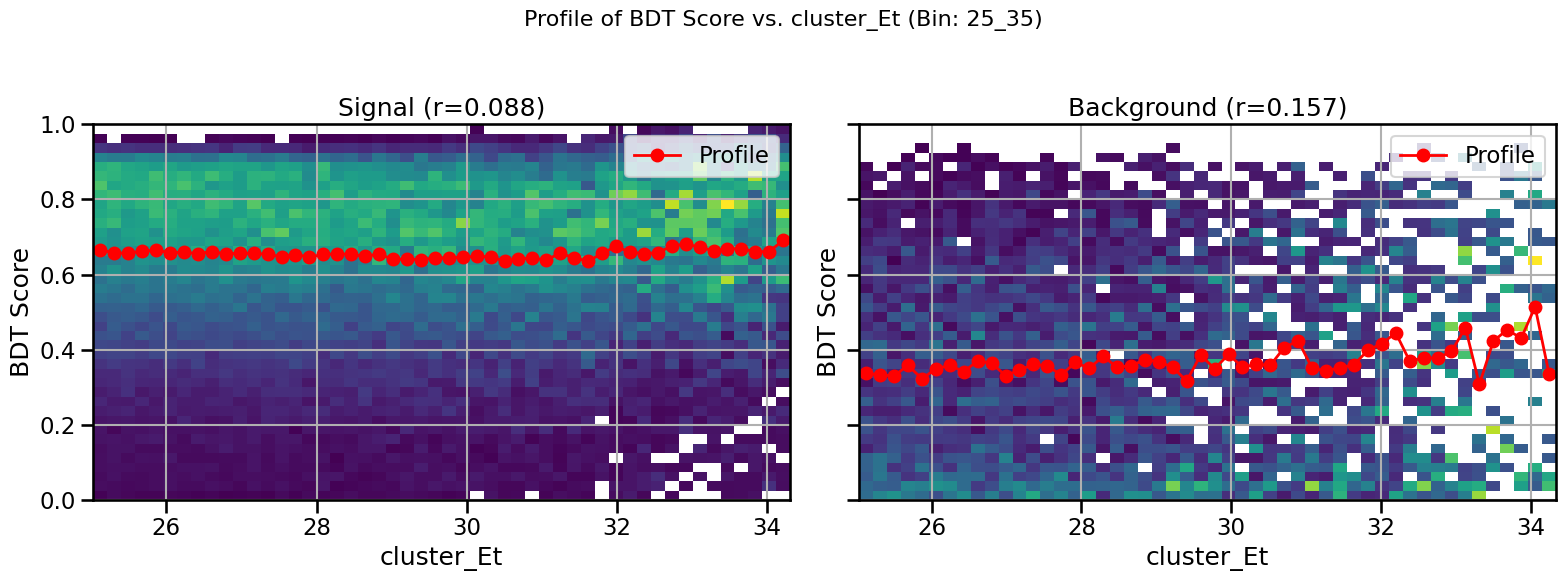

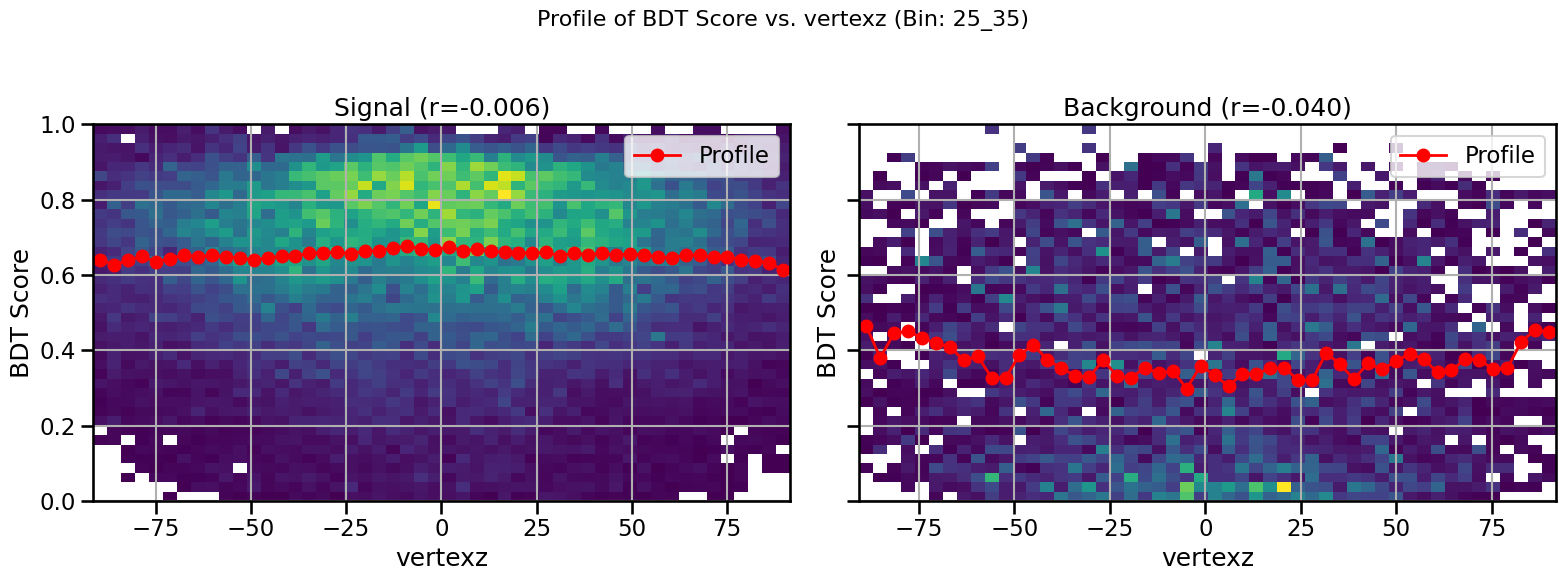

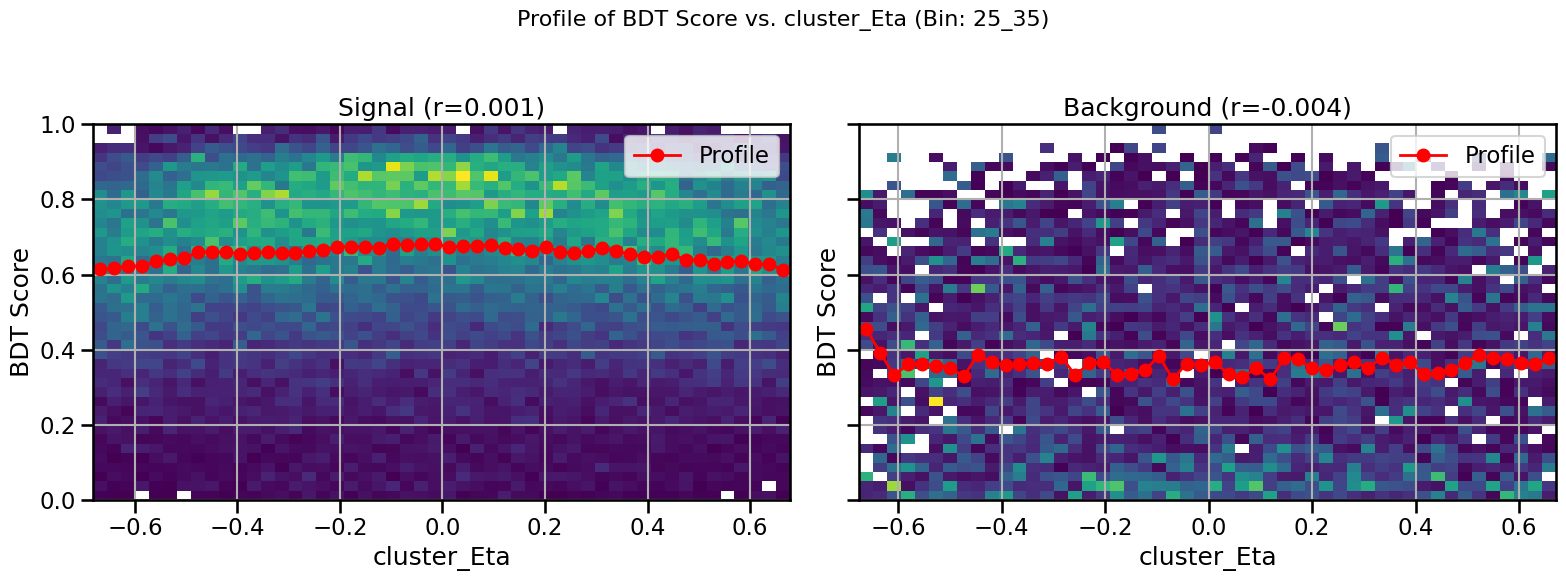

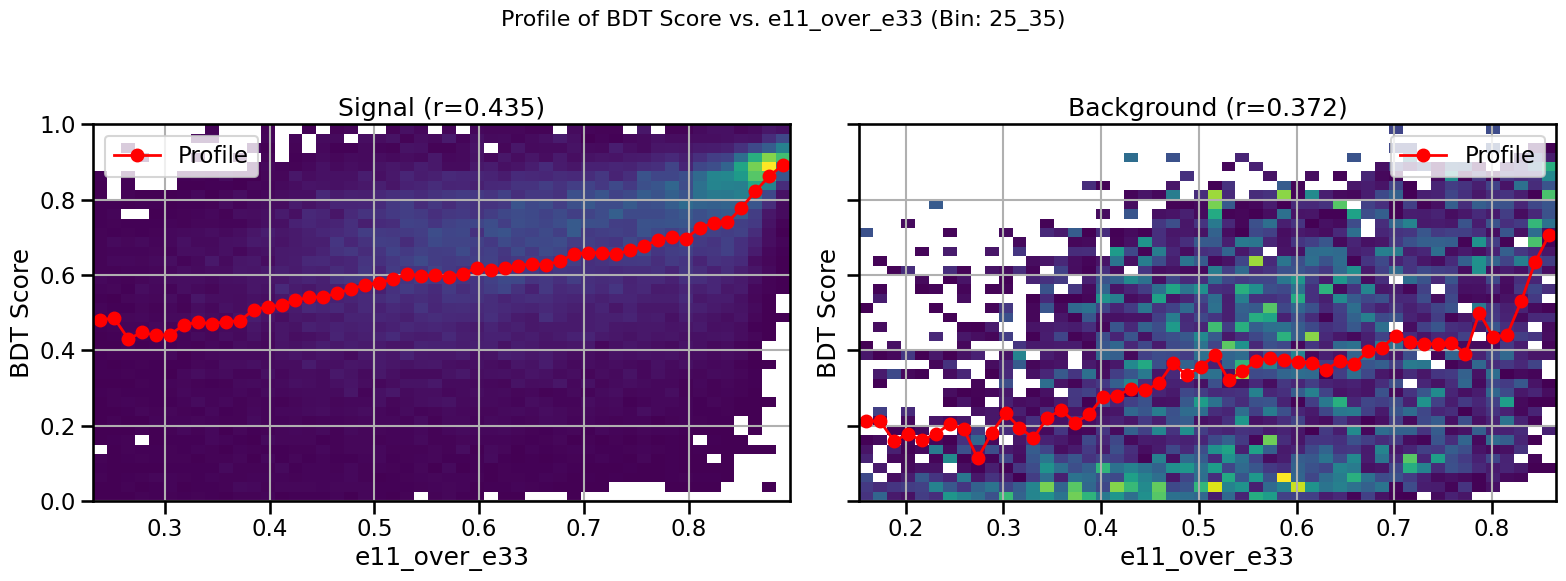

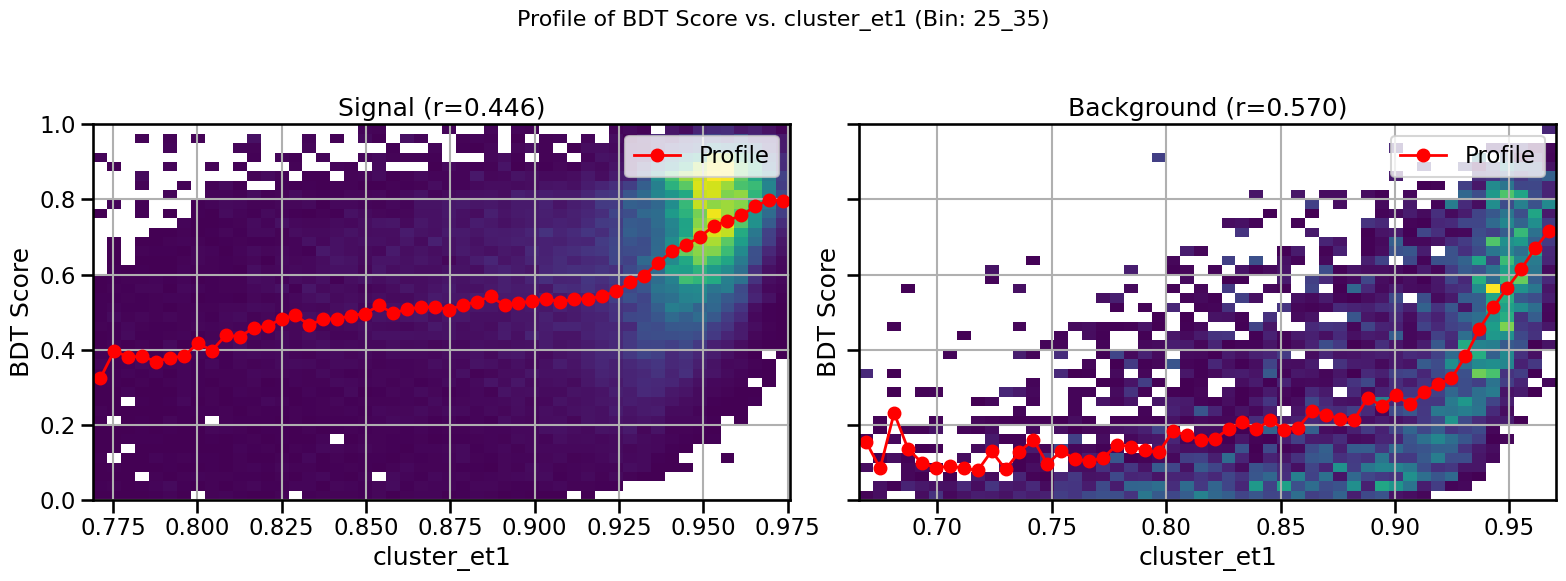

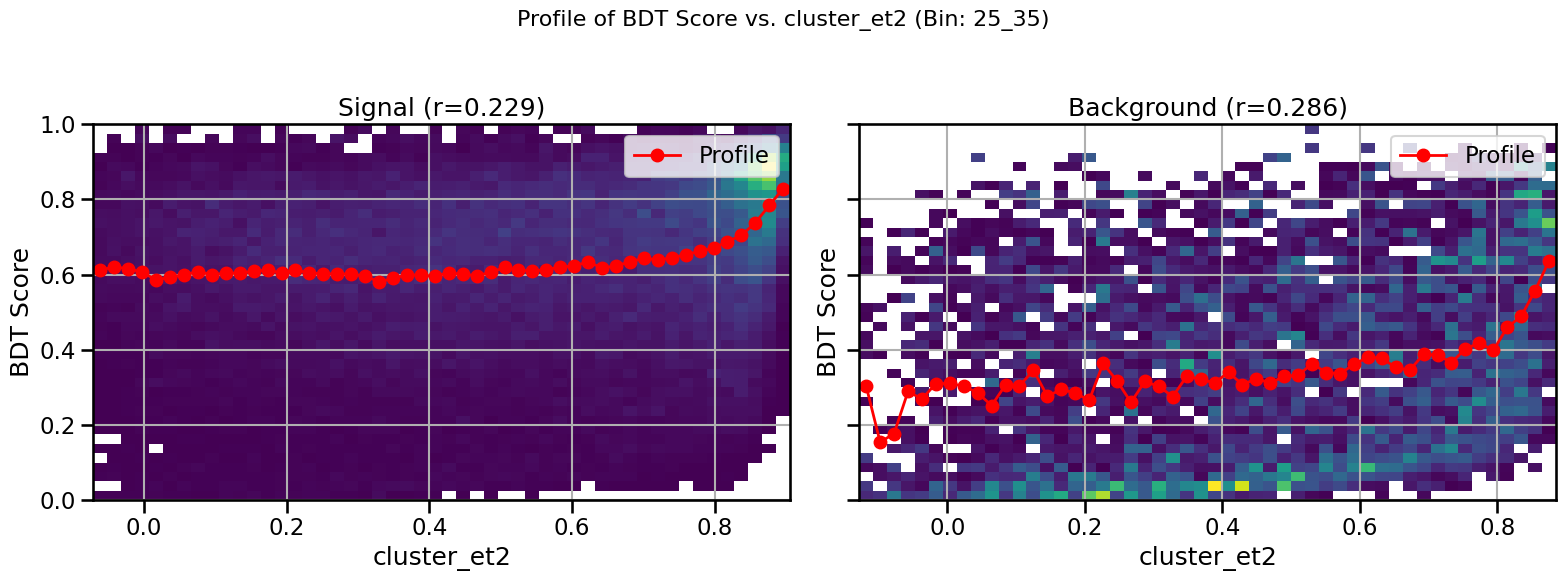

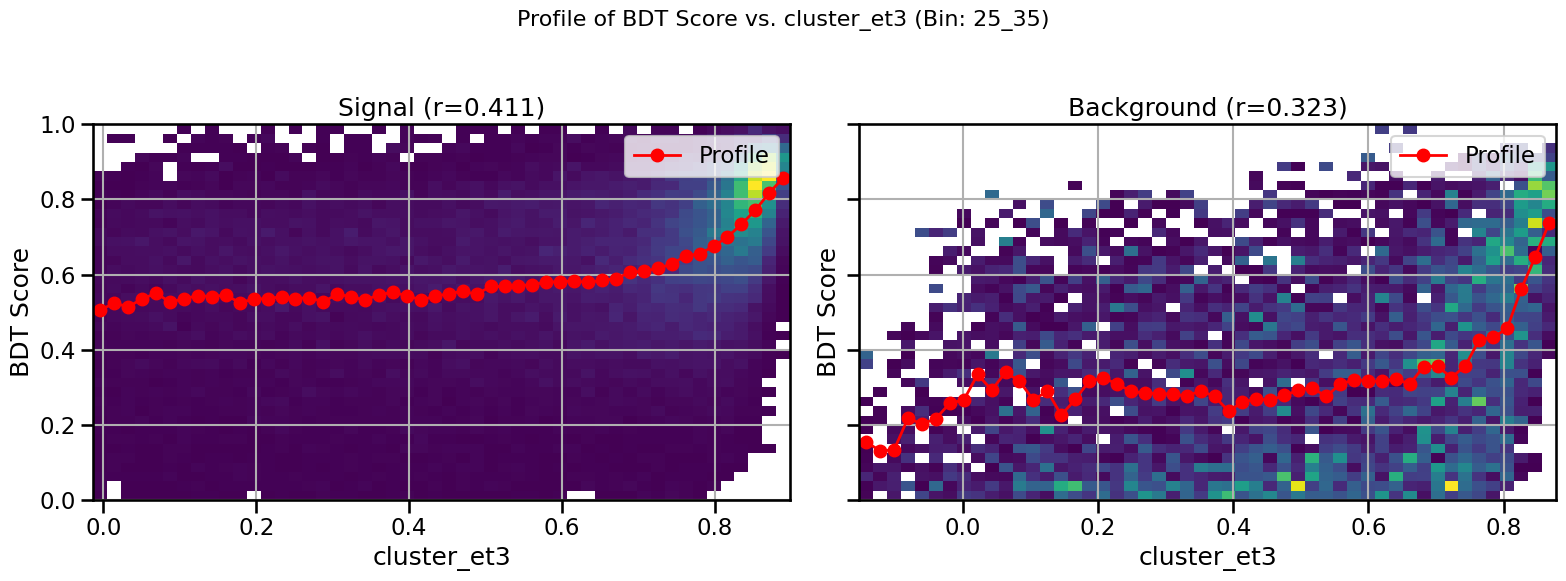

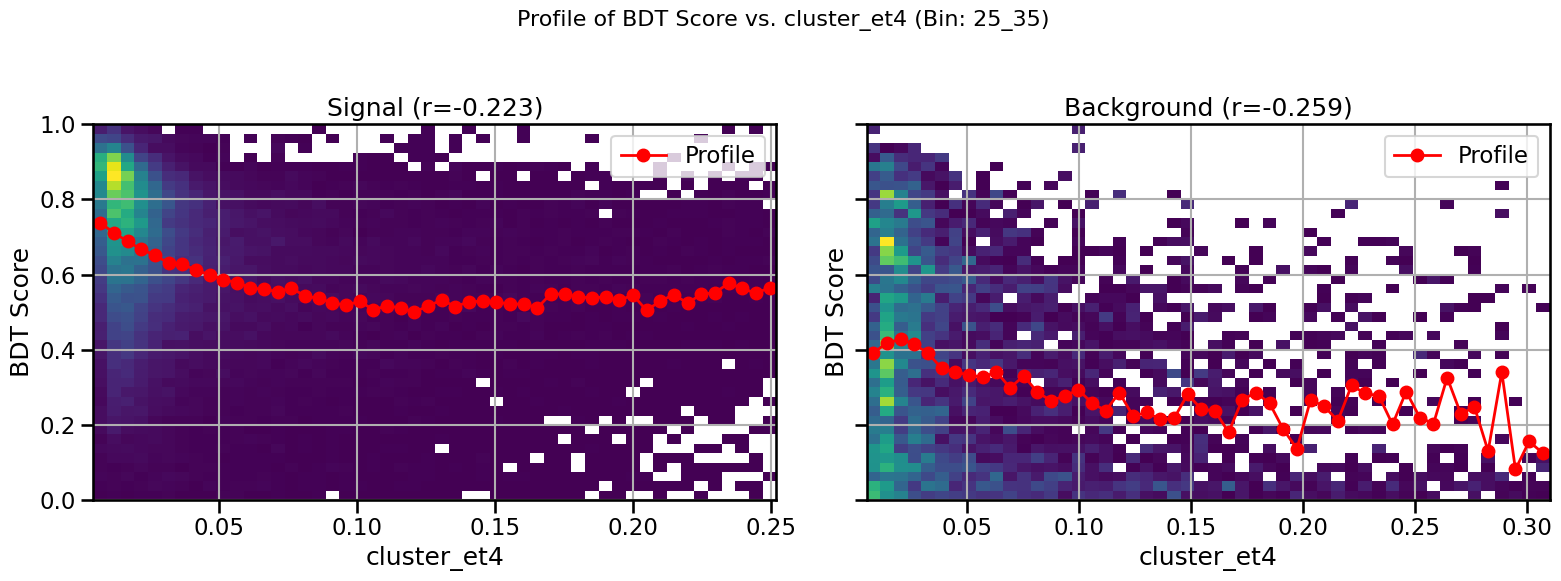

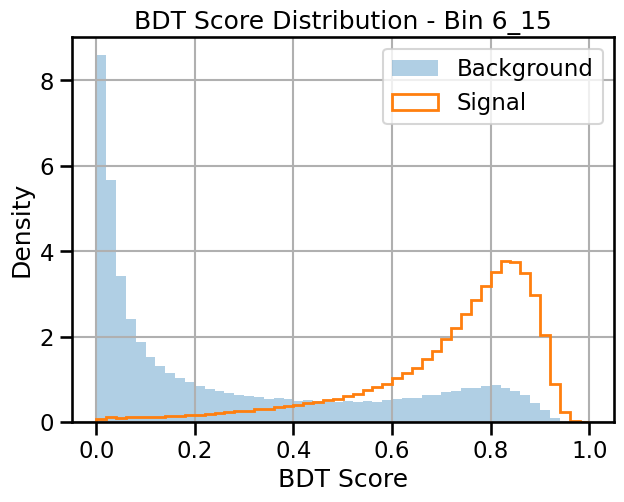

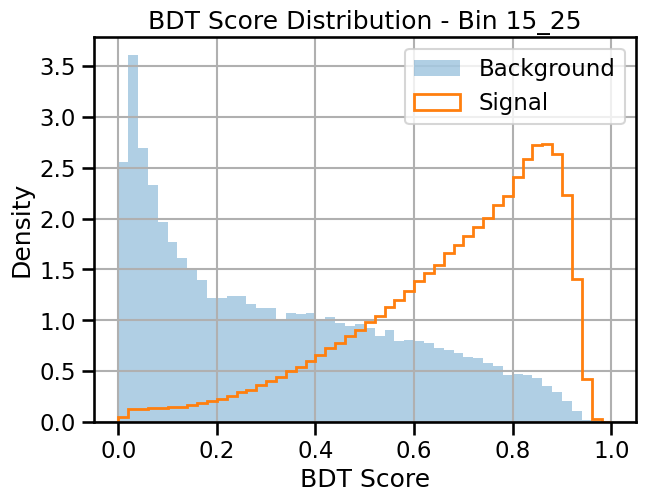

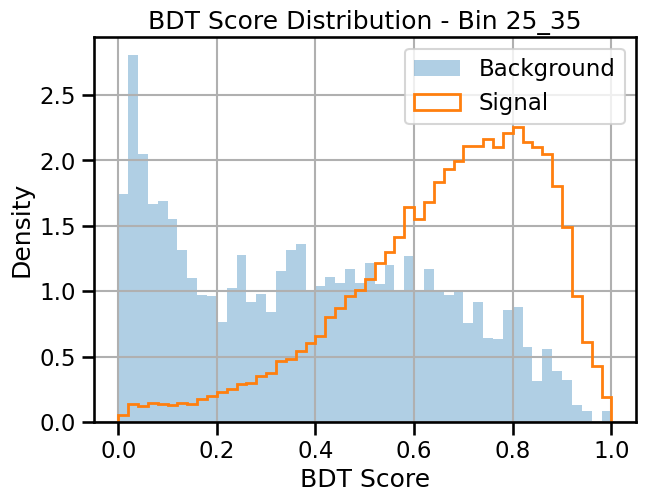

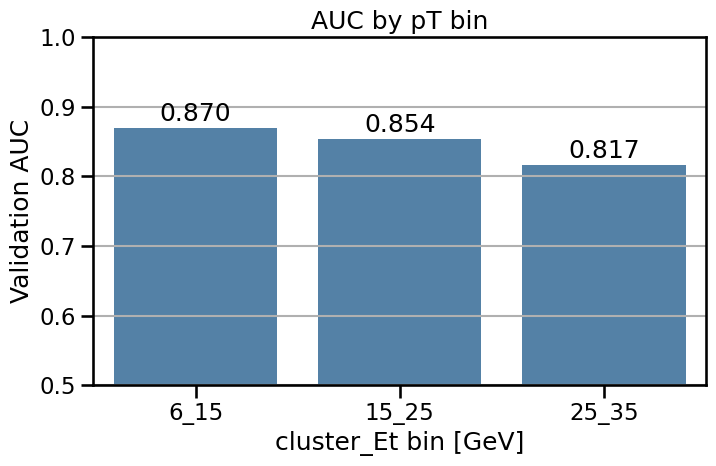

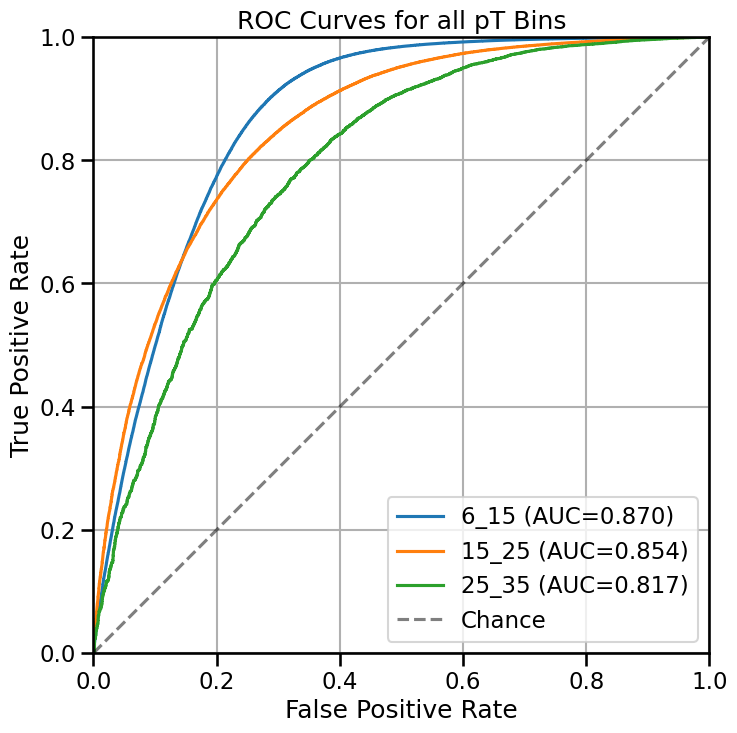

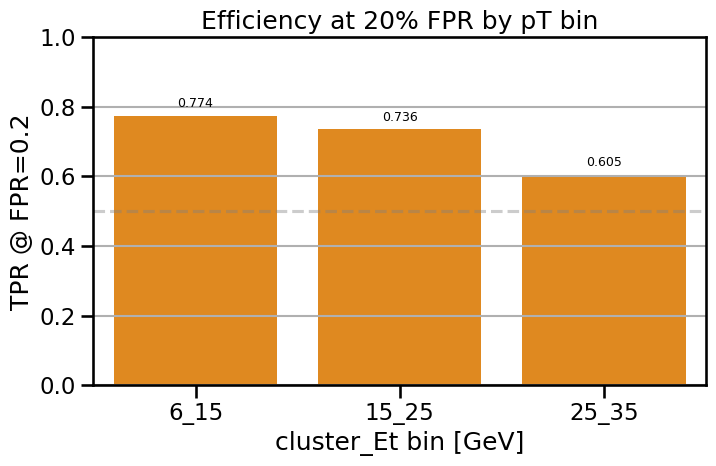

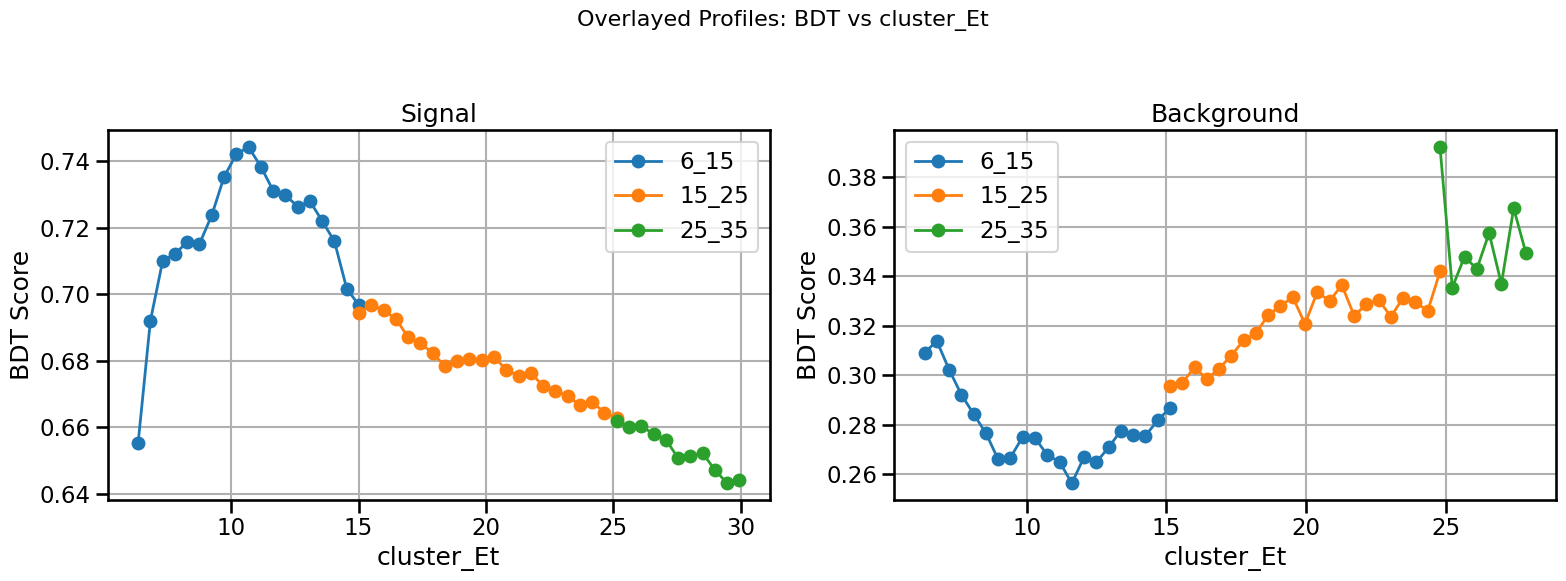

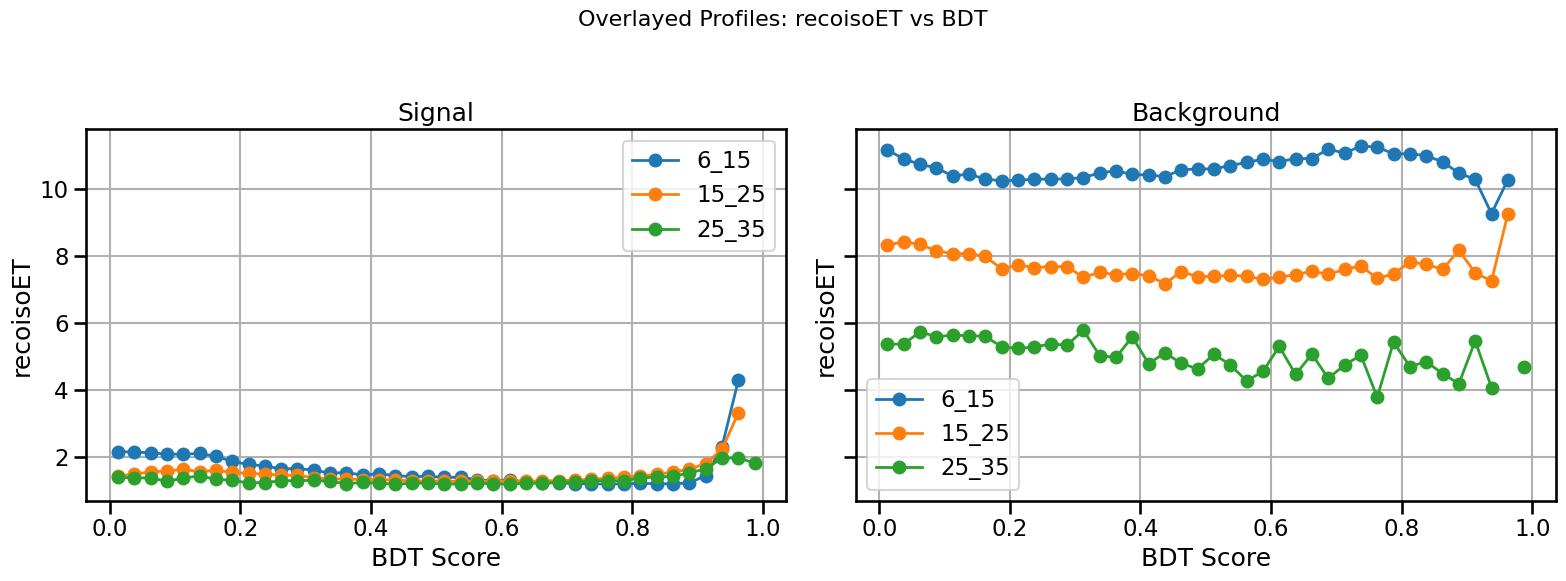

Memory usage: 7372.8 MB
Memory usage: 7372.8 MB
--- Saving Results ---
=== Saving Results ===
Saved model: binned_models/model_6_15.joblib
Saved model: binned_models/model_15_25.joblib
Saved model: binned_models/model_25_35.joblib
Saved metrics: binned_models/per_bin_metrics.csv
Saved metadata: binned_models/training_metadata.json
Memory usage: 7372.8 MB
Memory usage: 7372.8 MB
=== Pipeline completed successfully ===


In [2]:
# Create and run the training pipeline
pipeline = BinnedTrainingPipeline("config.yaml")

# Memory monitoring function
import psutil
import os
import gc

def print_memory_usage():
    process = psutil.Process(os.getpid())
    memory_mb = process.memory_info().rss / 1024 / 1024
    print(f"Memory usage: {memory_mb:.1f} MB")

# Monitor memory before starting
print("=== Memory Usage Monitoring ===")
print_memory_usage()

# Run the complete pipeline with memory management
print("--- Running Training ---")
pipeline.run_training()
print_memory_usage()
gc.collect()  # Force garbage collection
print_memory_usage()

print("--- Evaluating Models ---")
pipeline.evaluate_models()
print_memory_usage()
gc.collect()  # Force garbage collection
print_memory_usage()

# Debug: Check data structure before plotting
print("--- Debug: Checking Data Structure ---")
if hasattr(pipeline, "trained_pipelines"):
    print(f"Number of trained pipelines: {len(pipeline.trained_pipelines)}")
    for bin_label, entry in pipeline.trained_pipelines.items():
        print(f"Bin {bin_label}:")
        print(f"  - df_bin shape: {entry["df_bin"].shape if entry["df_bin"] is not None else 'None'}")
        print(f"  - df_bin columns: {entry["df_bin"].columns.tolist() if entry["df_bin"] is not None else 'None'}")
        if entry["df_bin"] is not None:
            if "weight" in entry["df_bin"].columns:
                print(f"  - weight column exists with {len(entry["df_bin"]["weight"])} values")
                print(f"  - weight range: {entry["df_bin"]["weight"].min():.3f} to {entry["df_bin"]["weight"].max():.3f}")
            else:
                print(f"  - weight column MISSING!")
                print(f"  - Available columns: {entry["df_bin"].columns.tolist()}")
                # Create weight column if missing
                print("  - Creating weight column with value 1.0...")
                entry["df_bin"] = entry["df_bin"].copy()  # Create a copy to avoid warnings
                entry["df_bin"]["weight"] = 1.0
                print("  - Weight column created successfully")
                
                # Also check if w_val exists and create if needed
                if "w_val" not in entry or entry["w_val"] is None:
                    print("  - w_val is missing, creating from weight column...")
                    entry["w_val"] = entry["df_bin"]["weight"].values
                    print("  - w_val created successfully")
        else:
            print("  - df_bin is None!")

print("--- Generating Plots ---")
pipeline.generate_plots()
print_memory_usage()
gc.collect()  # Force garbage collection
print_memory_usage()

print("--- Saving Results ---")
pipeline.save_results()
print_memory_usage()
gc.collect()  # Final cleanup
print_memory_usage()

print("=== Pipeline completed successfully ===")


In [3]:
# View Training Results
import pandas as pd

# Get training metrics
if hasattr(pipeline, "_save_metrics"):
    metrics_df = pipeline._save_metrics()
    print("📊 Training Metrics:")
    print(metrics_df.to_string(index=False))
else:
    print("Training metrics not available yet")

# Get correlation results if available
if hasattr(pipeline, "correlation_results"):
    print("📈 Correlation Results:")
    for bin_label, corr_data in pipeline.correlation_results.items():
        print(f"Bin {bin_label}:")
        print(f"  Pearson r: {corr_data["pearson_r"]:.3f}")
        print(f"  Spearman ρ: {corr_data["spearman_rho"]:.3f}")
        print(f"  N pairs: {corr_data["n_pairs"]}")
else:
    print("Correlation results not available yet")


Saved metrics: binned_models/per_bin_metrics.csv
📊 Training Metrics:
  bin  et_min  et_max  n_train   n_val  auc_train  auc_val  pearson_r  pearson_p  spearman_rho    spearman_p  n_pairs  train_time_sec
15_25    15.0    25.0  8274536  615326   0.856987 0.853261  -0.452062        NaN     -0.042324 6.597611e-242   615326          94.115
25_35    25.0    35.0  8274536   96946   0.856987 0.814296  -0.333480        NaN      0.038161  1.399100e-32    96946          94.115
 6_15     6.0    15.0  8274536 1356362   0.856987 0.861276  -0.491697        NaN     -0.500181  0.000000e+00  1356362          94.115
📈 Correlation Results:
Bin 6_15:
  Pearson r: -0.492
  Spearman ρ: -0.500
  N pairs: 1356362
Bin 15_25:
  Pearson r: -0.452
  Spearman ρ: -0.042
  N pairs: 615326
Bin 25_35:
  Pearson r: -0.333
  Spearman ρ: 0.038
  N pairs: 96946
